# Projecto Final


In [ ]:
import pandas as pd
import numpy as np

def read_data(filename):
    return pd.read_csv(filename, on_bad_lines='skip')

def fill_nan_with_mode(df, variables):
    for variable in variables:
        df[variable].fillna(df[variable].mode()[0], inplace=True)
    return df

def convert_object_to_number(df):

    # Select numeric columns.
    a = df.select_dtypes('number')
    # Select string and object columns.
    b = df.select_dtypes('object')

    # Fill numeric columns with mean.
    df[a.columns] = a.fillna(a.mean())
    # Fill object columns with mode.
    df[b.columns] = b.fillna(b.agg(lambda x: x.mode().values[0]))

    return df

def convert_to_number(df, variables):
    """
        Convert data frame type from object to number
    """
    for variable in variables:
        df[variable] = pd.to_numeric(df[variable],errors = 'coerce')
    return df


In [ ]:
df = read_data("../Dataset/D - Physiology features .csv")

del df['Unnamed: 7']
del df['Unnamed: 8']
del df['Unnamed: 9']
del df['Unnamed: 10']
del df['Unnamed: 11']

cols_1 = list(df)

df = fill_nan_with_mode(df, cols_1)
df = convert_object_to_number(df)

from sklearn import preprocessing
for variable in [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]:
    le_last_scraped	 = preprocessing.LabelEncoder()
    le_last_scraped.fit(df[variable])
    df['le_' + variable] = le_last_scraped.transform(df[variable])
    df = df.drop(variable, axis='columns')
    df = df.rename(columns={'le_' + variable: variable})

df = df.dropna(axis=0, how='all')


In [74]:
df.dtypes

C              int64
HR             int64
RMSSD        float64
SCL          float64
PP             int64
Condition      int64
timestamp      int64
dtype: object

In [75]:
df.head(3)

,C,HR,RMSSD,SCL,PP,Condition,timestamp
0,1,999,999.000000,80.239727,0,2,0
1,1,61,0.061420,77.365127,0,2,1
2,1,64,0.049663,77.359559,0,2,2


In [76]:
df.shape

(3140, 7)

In [24]:
pd.set_option('display.max_rows',None)
df.isna().sum()



PP              3140
C                  0
Condition       3140
HR                 0
RMSSD              0
SCL                0
le_timestamp       0
dtype: int64

In [77]:

df.isna().sum()

C            0
HR           0
RMSSD        0
SCL          0
PP           0
Condition    0
timestamp    0
dtype: int64

## Escribir dataset limpio a un archivo

In [78]:
df.to_csv('../Dataset/generated/D_cleaned.csv', index=False) 

# Estudio outlier

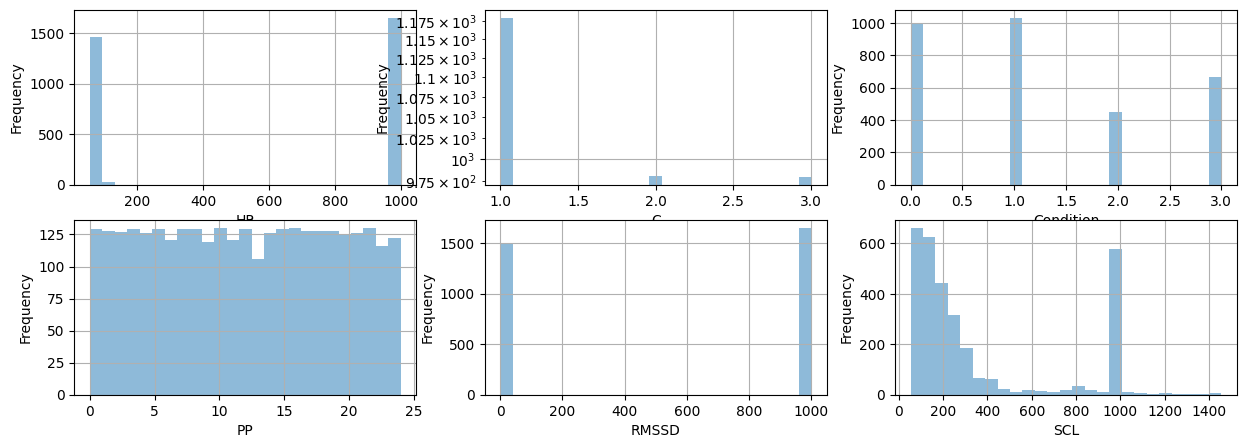

In [79]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 5))

plt.subplot(2,3,1)
df['HR'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.yscale("log")
plt.xlabel('HR')

plt.subplot(2,3,2)
df['C'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('C')

plt.subplot(2,3,3)
df['Condition'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Condition')

plt.subplot(2,3,4)
df['PP'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('PP')

plt.subplot(2,3,5)
df['RMSSD'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('RMSSD')


plt.subplot(2,3,6)
df['SCL'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('SCL')

plt.show()


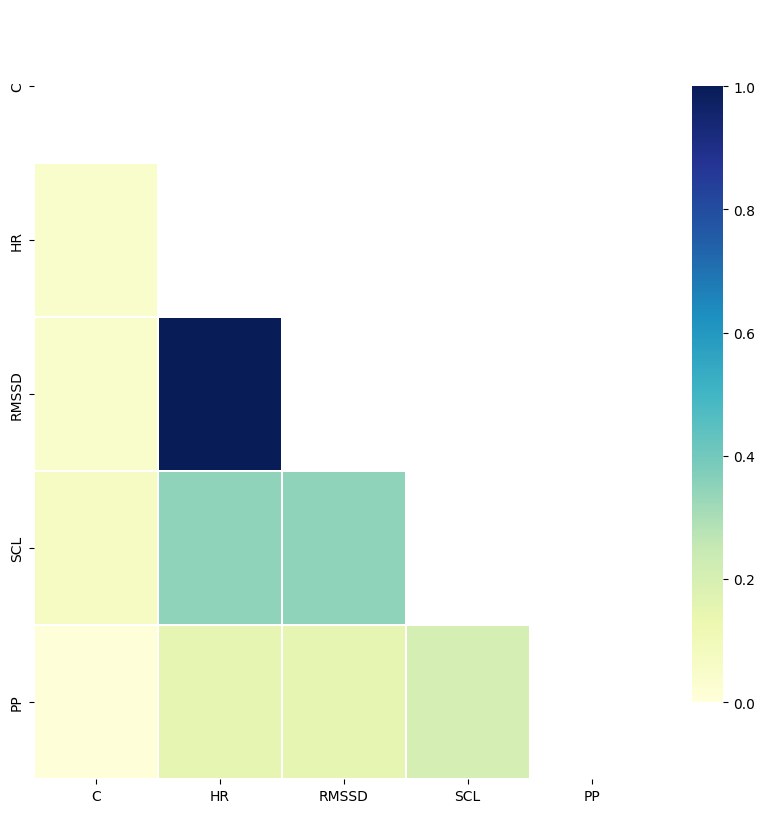

In [82]:
import seaborn as sns

def matriz_correlacion(df):
    # Compute the correlation matrix
    corr = np.abs(result.drop(['Condition'], axis=1).corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
                linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

    plt.show()

result = df.drop('timestamp', axis=1)
matriz_correlacion(result)